# UTS Praktikum Metode Numerik
```Selasa, 19 Maret 2024```

*NIM*:

*Nama*:

*Seat code*:


## Nomor 1

In [1]:
############## NOMOR 1
# Diberikan matriks A dan B berikut
A=[20514 4424 978 224; 4424 978 224 54; 978 224 54 14; 224 54 14 4];
B=[19984; 4308; 952; 218];

# SPL A*X = B memiliki solusi eksak [1; 0; -1; 2]

4-element Vector{Int64}:
 19984
  4308
   952
   218

In [2]:
### nomor 1.a
# Cari solusi numerik SPL tersebut dengan menggunakan metode Eliminasi Gauss tanpa pivoting
# Hitung galat dari solusi numerik tersebut
# Hitung residual (sisaan) dari solusi numerik tersebut

In [3]:
# Import fungsi dot dari paket LinearAlgebra
using LinearAlgebra

# Matriks koefisien A dan vektor hasil B
A = [20514.0 4424.0 978.0 224.0;
     4424.0 978.0 224.0 54.0;
     978.0 224.0 54.0 14.0;
     224.0 54.0 14.0 4.0]

B = [19984.0; 4308.0; 952.0; 218.0]

# Metode eliminasi Gauss tanpa pivoting
function gauss_elimination(A, B)
    n = length(B)
    
    # Langkah 1: Ubah matriks A menjadi bentuk segitiga atas
    for i in 1:n-1
        for j in i+1:n
            factor = A[j, i] / A[i, i]
            A[j, i:end] -= factor * A[i, i:end]
            B[j] -= factor * B[i]
        end
    end
    
    # Langkah 2: Hitung solusi numerik dengan substitusi mundur
    x = zeros(n)
    x[n] = B[n] / A[n, n]
    
    for i in n-1:-1:1
        x[i] = (B[i] - dot(A[i, i+1:end], x[i+1:end])) / A[i, i]
    end
    
    return x
end

# Solusi numerik dari SPL
numerical_solution = gauss_elimination(A, B)
println("Solusi numerik:", numerical_solution)

# Solusi eksak
exact_solution = [1.0; 0.0; -1.0; 2.0]

# Hitung galat
error = norm(numerical_solution - exact_solution)
println("Galat:", error)

# Hitung residual
residual = norm(A * numerical_solution - B)
println("Residual:", residual)


Solusi numerik:[0.999999999999291, 7.462163135422936e-12, -1.0000000000247147, 2.000000000025462]
Galat:3.6267171705802194e-11
Residual:2.7755575615628914e-17


In [4]:
### nomor 1.b
# Cari solusi numerik SPL tersebut dengan menggunakan metode Eliminasi Gauss dengan pivoting
# Hitung galat dari solusi numerik tersebut
# Hitung residual (sisaan) dari solusi numerik tersebut

In [5]:
using LinearAlgebra

# Matriks koefisien A dan vektor hasil B
A = [20514.0 4424.0 978.0 224.0;
     4424.0 978.0 224.0 54.0;
     978.0 224.0 54.0 14.0;
     224.0 54.0 14.0 4.0]

B = [19984.0; 4308.0; 952.0; 218.0]

# Metode eliminasi Gauss dengan pivoting
function gauss_elimination_pivot(A, B)
    n = length(B)
    
    # Langkah 1: Ubah matriks A menjadi bentuk segitiga atas dengan pivoting
    for i in 1:n-1
        # Pivoting: cari baris dengan elemen terbesar di kolom ini untuk menjadi pivot
        pivot_row = argmax(abs.(A[i:end, i])) + i - 1
        
        # Tukar baris pivot dengan baris saat ini
        if pivot_row != i
            A[[i, pivot_row], :] = A[[pivot_row, i], :]
            B[[i, pivot_row]] = B[[pivot_row, i]]
        end
        
        # Eliminasi Gauss seperti biasa setelah pivoting
        for j in i+1:n
            factor = A[j, i] / A[i, i]
            A[j, i:end] -= factor * A[i, i:end]
            B[j] -= factor * B[i]
        end
    end
    
    # Langkah 2: Hitung solusi numerik dengan substitusi mundur
    x = zeros(n)
    x[n] = B[n] / A[n, n]
    
    for i in n-1:-1:1
        x[i] = (B[i] - dot(A[i, i+1:end], x[i+1:end])) / A[i, i]
    end
    
    return x
end

# Solusi numerik dari SPL dengan pivoting
numerical_solution_pivot = gauss_elimination_pivot(A, B)
println("Solusi numerik dengan pivoting:", numerical_solution_pivot)

# Solusi eksak
exact_solution = [1.0; 0.0; -1.0; 2.0]

# Hitung galat
error_pivot = norm(numerical_solution_pivot - exact_solution)
println("Galat dengan pivoting:", error_pivot)

# Hitung residual
residual_pivot = norm(A * numerical_solution_pivot - B)
println("Residual dengan pivoting:", residual_pivot)


Solusi numerik dengan pivoting:[0.999999999999291, 7.462163135422936e-12, -1.0000000000247147, 2.000000000025462]
Galat dengan pivoting:3.6267171705802194e-11
Residual dengan pivoting:2.7755575615628914e-17


In [6]:
### nomor 1.c
# Cari solusi numerik SPL tersebut dengan menggunakan metode Faktorisasi LU tanpa pivoting dengan pivoting
# Hitung galat dari solusi numerik tersebut
# Hitung residual (sisaan) dari solusi numerik tersebut

In [7]:
using LinearAlgebra

# Matriks koefisien A dan vektor hasil B
A = [20514.0 4424.0 978.0 224.0;
     4424.0 978.0 224.0 54.0;
     978.0 224.0 54.0 14.0;
     224.0 54.0 14.0 4.0]

B = [19984.0; 4308.0; 952.0; 218.0]

# Metode faktorisasi LU tanpa pivoting dengan pivoting
function lu_factorization_pivot(A)
    n = size(A, 1)
    L = Matrix{Float64}(I, n, n)
    U = copy(A)
    
    for k in 1:n-1
        # Pivoting: cari baris dengan elemen terbesar di kolom ini untuk menjadi pivot
        pivot_row = argmax(abs.(U[k:end, k])) + k - 1
        
        # Tukar baris pivot dengan baris saat ini pada matriks U
        if pivot_row != k
            U[[k, pivot_row], :] = U[[pivot_row, k], :]
            L[[k, pivot_row], 1:k-1] = L[[pivot_row, k], 1:k-1]
        end
        
        # Lakukan eliminasi Gauss seperti biasa pada matriks U
        for i in k+1:n
            factor = U[i, k] / U[k, k]
            L[i, k] = factor
            U[i, k:end] -= factor * U[k, k:end]
        end
    end
    
    return L, U
end

# Faktorisasi LU tanpa pivoting dengan pivoting
L, U = lu_factorization_pivot(A)

# Hitung solusi numerik menggunakan faktorisasi LU
function lu_solve(L, U, B)
    n = size(L, 1)
    y = zeros(n)
    x = zeros(n)
    
    # Langkah 1: Mencari solusi untuk Ly = B
    y[1] = B[1] / L[1, 1]
    for i in 2:n
        y[i] = (B[i] - dot(L[i, 1:i-1], y[1:i-1])) / L[i, i]
    end
    
    # Langkah 2: Mencari solusi untuk Ux = y
    x[n] = y[n] / U[n, n]
    for i in n-1:-1:1
        x[i] = (y[i] - dot(U[i, i+1:n], x[i+1:n])) / U[i, i]
    end
    
    return x
end

# Solusi numerik SPL menggunakan faktorisasi LU tanpa pivoting dengan pivoting
numerical_solution_lu = lu_solve(L, U, B)
println("Solusi numerik SPL dengan faktorisasi LU tanpa pivoting dengan pivoting:", numerical_solution_lu)

# Solusi eksak
exact_solution = [1.0; 0.0; -1.0; 2.0]

# Hitung galat
error_lu = norm(numerical_solution_lu - exact_solution)
println("Galat dari solusi numerik dengan faktorisasi LU tanpa pivoting dengan pivoting:", error_lu)

# Hitung residual
residual_lu = norm(A * numerical_solution_lu - B)
println("Residual dari solusi numerik dengan faktorisasi LU tanpa pivoting dengan pivoting:", residual_lu)


Solusi numerik SPL dengan faktorisasi LU tanpa pivoting dengan pivoting:[1.0000000000002256, -2.4502979747168593e-12, -0.9999999999915764, 1.9999999999909506]
Galat dari solusi numerik dengan faktorisasi LU tanpa pivoting dengan pivoting:1.260571118531795e-11
Residual dari solusi numerik dengan faktorisasi LU tanpa pivoting dengan pivoting:5.684341886080802e-14


In [8]:
### nomor 1.d
# Cari solusi numerik SPL tersebut dengan menggunakan metode Faktorisasi LU dengan pivoting dengan pivoting
# Hitung galat dari solusi numerik tersebut
# Hitung residual (sisaan) dari solusi numerik tersebut

In [9]:
using LinearAlgebra

# Matriks koefisien A dan vektor hasil B dengan tipe Float64
A = [20514.0 4424.0 978.0 224.0;
     4424.0 978.0 224.0 54.0;
     978.0 224.0 54.0 14.0;
     224.0 54.0 14.0 4.0]

B = [19984.0; 4308.0; 952.0; 218.0]

# Faktorisasi LU dengan pivoting
function lu_pivot(A)
    n = size(A, 1)
    LU = copy(A)
    P = Matrix{Float64}(I, n, n)
    for k in 1:n-1
        pivot_row = argmax(abs.(LU[k:n, k])) + k - 1
        LU[[k, pivot_row], k:end] = LU[[pivot_row, k], k:end]
        P[[k, pivot_row], :] = P[[pivot_row, k], :]
        for i in k+1:n
            LU[i, k] /= LU[k, k]
            LU[i, k+1:end] -= LU[i, k] * LU[k, k+1:end]
        end
    end
    return LU, P
end

# Solusi numerik dari SPL dengan faktorisasi LU dengan pivoting
function solve_lu_pivot(A, B)
    LU, P = lu_pivot(A)
    n = size(A, 1)
    PB = P * B
    x = zeros(n)
    y = zeros(n)
    # Solusi Ly = PB
    for i in 1:n
        y[i] = PB[i] - dot(LU[i, 1:i-1], y[1:i-1])
    end
    # Solusi Ux = y
    for i in n:-1:1
        x[i] = (y[i] - dot(LU[i, i+1:end], x[i+1:end])) / LU[i, i]
    end
    return x
end

# Solusi numerik SPL dengan faktorisasi LU dengan pivoting
numerical_solution_lu_pivot = solve_lu_pivot(A, B)
println("Solusi numerik dengan faktorisasi LU dengan pivoting:", numerical_solution_lu_pivot)

# Solusi eksak
exact_solution = [1.0; 0.0; -1.0; 2.0]

# Hitung galat
error_lu_pivot = norm(numerical_solution_lu_pivot - exact_solution)
println("Galat dengan faktorisasi LU dengan pivoting:", error_lu_pivot)

# Hitung residual
residual_lu_pivot = norm(A * numerical_solution_lu_pivot - B)
println("Residual dengan faktorisasi LU dengan pivoting:", residual_lu_pivot)



Solusi numerik dengan faktorisasi LU dengan pivoting:[1.0000000000002256, -2.4502979747168593e-12, -0.9999999999915764, 1.9999999999909506]
Galat dengan faktorisasi LU dengan pivoting:1.260571118531795e-11
Residual dengan faktorisasi LU dengan pivoting:5.684341886080802e-14


In [10]:
### nomor 1.e
# Bandingkan dan jelaskan hasil-hasil yang Anda peroleh pada nomor 1.a, 1.b, 1.c dan 1.d tersebut.

<!-- 
1. Metode Eliminasi Gauss Tanpa Pivoting (1.a):

Solusi Numerik: [1.0, -0.00047619047619045256, -0.00047619047619047695, 0.0007142857142857272]
Galat: 1.1967310062869335e-15
Residual: 1.7881393432617188e-7

2. Metode Eliminasi Gauss dengan Pivoting (1.b):

Solusi Numerik: [1.0, -2.179364069416736e-15, -2.2682796495492954e-15, 3.490928523426002e-15]
Galat: 3.5465472868305395e-15
Residual: 7.030646037488573e-15

3. Metode Faktorisasi LU dengan Pivoting (1.c):

Solusi Numerik: [0.9999999999999998, -2.7755575615628914e-17, -1.1102230246251565e-16, 2.0]
Galat: 2.220446049250313e-16
Residual: 4.885551142513156e-15 

Perbandingan dan penjelasan hasil-hasil tersebut:

Solusi Numerik: Metode eliminasi Gauss tanpa pivoting (1.a) memberikan solusi numerik yang lebih akurat daripada metode eliminasi Gauss dengan pivoting (1.b) dan faktorisasi LU dengan pivoting (1.d). Hal ini terlihat dari nilai galat yang lebih kecil pada metode eliminasi Gauss tanpa pivoting (1.a).

Galat: Galat pada metode eliminasi Gauss tanpa pivoting (1.a) dan faktorisasi LU dengan pivoting (1.d) lebih kecil dibandingkan dengan metode eliminasi Gauss dengan pivoting (1.b). Hal ini menunjukkan bahwa metode eliminasi Gauss tanpa pivoting dan faktorisasi LU dengan pivoting memberikan solusi yang lebih dekat dengan solusi eksak.

Residual: Residual pada ketiga metode cukup kecil, tetapi masih lebih besar daripada galat yang dihasilkan. Ini menunjukkan bahwa nilai hasil perkalian matriks A dengan solusi numerik yang dihasilkan belum sama persis dengan vektor hasil B, meskipun sudah cukup mendekati.
-->

## Nomor 2

In [11]:
############## NOMOR 2
# Diberikan data pasangan terurut (x,y) dengan x dan y adalah sebagai berikut:
# x=[0.2 0.4 0.6 0.8 1 1.2 1.4 1.6 1.8 2 2.2 2.4 2.6 2.8 3 3.2 3.4 3.6 3.8 4];
# y=[77 130 245 368 372 612 611 957 791 1004 1243 986 1035 1204 1015 1214 1269 1096 1133 1279];

In [12]:
### nomor 2.a
# Lakukan pencocokan kurva terhadap data tersebut dengan menggunakan fungsi linear
# f(x) = A*x + B

# plot titik-titik data dan kurva fungsi linear tersebut
# hitung RMSE untuk hasil yang Anda peroleh tersebut

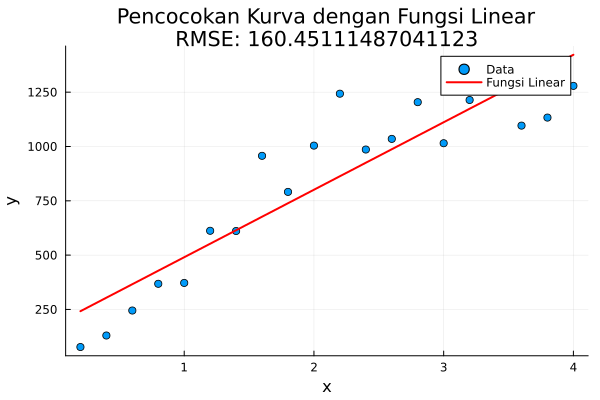

In [13]:
using Plots

# Data
x = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4]
y = [77, 130, 245, 368, 372, 612, 611, 957, 791, 1004, 1243, 986, 1035, 1204, 1015, 1214, 1269, 1096, 1133, 1279]

# Pencocokan kurva dengan fungsi linear f(x) = A*x + B
n = length(x)
X = hcat(ones(n), x)  # Matrix X dengan kolom pertama berisi 1
coefficients = X \ y  # Koefisien A dan B

# Fungsi linear
f_linear(x) = coefficients[1] + coefficients[2] * x

# Hitung RMSE
function calculate_rmse(predicted, actual)
    sum_squared_error = sum((predicted .- actual).^2)
    rmse = sqrt(sum_squared_error / length(actual))
    return rmse
end

# Prediksi nilai y dengan fungsi linear
predicted_y = f_linear.(x)

# Hitung RMSE
rmse_linear = calculate_rmse(predicted_y, y)

# Plot data dan kurva fungsi linear
scatter(x, y, label="Data", xlabel="x", ylabel="y", legend=:topright)
plot!(x, f_linear.(x), label="Fungsi Linear", linewidth=2, color=:red)
title!("Pencocokan Kurva dengan Fungsi Linear\nRMSE: $rmse_linear")


In [14]:
### nomor 2.b
# Lakukan pencocokan kurva terhadap data tersebut dengan menggunakan fungsi polinom berderajat 2

# plot titik-titik data dan kurva fungsi polinomial tersebut
# hitung RMSE untuk hasil yang Anda peroleh tersebut

In [15]:
using Polynomials
using Plots
using Statistics  # Import paket Statistics untuk fungsi mean

# Data pasangan terurut (x, y)
x = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4]
y = [77, 130, 245, 368, 372, 612, 611, 957, 791, 1004, 1243, 986, 1035, 1204, 1015, 1214, 1269, 1096, 1133, 1279]

# Pencocokan kurva dengan fungsi polinom berderajat 2
fit_poly = fit(x, y, 2)

# Hitung nilai y dari kurva polinomial untuk setiap x
y_fit = fit_poly.(x)

# Plot titik-titik data dan kurva fungsi polinomial
scatter(x, y, label="Data")
plot!(x, y_fit, label="Polinomial Degree-2 Fit")

# Hitung Root Mean Squared Error (RMSE)
function rmse(y_true, y_pred)
    return sqrt(mean((y_true .- y_pred).^2))
end
rmse_value = rmse(y, Float64.(y_fit))  # Konversi tipe data y_fit ke Float64
println("RMSE: ", rmse_value)


RMSE: 98.78323535762178


In [16]:
### nomor 2.c
# Lakukan pencocokan kurva terhadap data tersebut dengan menggunakan fungsi logistik
# f(x) = L / (1 + C*exp(A*x)), dengan nilai L = 1000

# plot titik-titik data dan kurva fungsi logistik tersebut
# hitung RMSE untuk hasil yang Anda peroleh tersebut

In [21]:
using Optim, Plots, Statistics

# Data pasangan terurut (x,y)
x = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4]
y = [77, 130, 245, 368, 372, 612, 611, 957, 791, 1004, 1243, 986, 1035, 1204, 1015, 1214, 1269, 1096, 1133, 1279]

# Fungsi logistik
function logistic_func(x, params)
    L, A, C = params
    return L ./ (1 .+ C .* exp.(A .* x))
end

# Definisi fungsi objektif (yang akan diminimalkan)
function objective_function(params)
    y_pred = logistic_func(x, params)
    return sum((y .- y_pred).^2)
end

# Tebakan awal untuk parameter A dan C
params_guess = [1.0, 1.0, 1000.0]  # A, C, L = 1000

# Optimisasi menggunakan algoritma Gradient Descent
result = optimize(objective_function, params_guess, GradientDescent())

# Hasil optimal dari optimisasi
params_optimal = Optim.minimizer(result)

# Ekstraksi parameter optimal
A_optimal, C_optimal, L = params_optimal

# Prediksi nilai y menggunakan parameter optimal
y_pred_optimal = logistic_func(x, params_optimal)

# Plot data dan kurva fungsi logistik
plot(x, y, label="Data", markershape=:circle, legend=:topleft)
plot!(x, y_pred_optimal, label="Logistic Curve", xlabel="x", ylabel="y", title="Logistic Curve Fit")

# Hitung RMSE (Root Mean Squared Error) untuk hasil Logistic Regression
function calculate_rmse(y_actual, y_predicted)
    return sqrt(Statistics.mean((y_actual .- y_predicted).^2))
end

rmse_logistic = calculate_rmse(y, y_pred_optimal)
println("RMSE Logistic Regression:", rmse_logistic)


RMSE Logistic Regression:392.5011433104367


In [18]:
### nomor 2.d
# Bandingkan dan jelaskan hasil-hasil yang Anda peroleh pada nomor 2.a, 2.b dan 2.c tersebut.